In [59]:
# Uses martons code to align dlc stuff with video. You can get all the DLC variables nicely in csv files in DLC/side folder
!gcsfuse --implicit-dirs --only-dir marton.rozsa aind-transfer-service-test ./bucket

2022/06/03 21:34:03.421744 Start gcsfuse/0.41.1 (Go version go1.17.6) for app "" using mount point: /home/jupyter/bucket
2022/06/03 21:34:03.439084 Opening GCS connection...
2022/06/03 21:34:03.596674 Mounting file system "aind-transfer-service-test"...
daemonize.Run: readFromProcess: sub-process: mountWithArgs: mountWithConn: Mount: mount: running /usr/bin/fusermount: exit status 1


In [3]:
os.path.abspath("bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/BCI_2:q6/040822-bpod_zaber.npy")

'c:\\Users\\mohit.kulkarni\\Documents\\GitHub\\BCI_analysis\\Notebooks\\bucket\\Data\\Behavior\\BCI_exported\\Bergamo-2P-Photostim\\BCI_26\\040822-bpod_zaber.npy'

In [ ]:
import numpy 

side camera video not found in trial 1
side camera video not found in trial 4


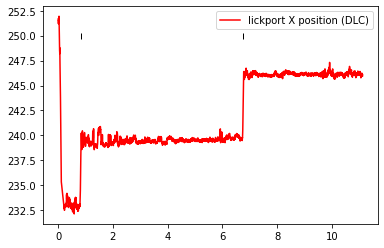

side camera video not found in trial 9
side camera video not found in trial 11
side camera video not found in trial 16
side camera video not found in trial 18
side camera video not found in trial 22
side camera video not found in trial 25
side camera video not found in trial 31
side camera video not found in trial 32
side camera video not found in trial 36
side camera video not found in trial 39
side camera video not found in trial 41
side camera video not found in trial 46
side camera video not found in trial 50
side camera video not found in trial 54
side camera video not found in trial 56
side camera video not found in trial 61
side camera video not found in trial 69
side camera video not found in trial 70
side camera video not found in trial 71
side camera video not found in trial 73
side camera video not found in trial 74
side camera video not found in trial 75
side camera video not found in trial 76
side camera video not found in trial 77
side camera video not found in trial 78
s

In [1]:
#%% load DLC traces and align to traces
import numpy as np
import os, json, re
import pandas as pd
import matplotlib.pyplot as plt
dlc_base_dir = os.path.abspath('../bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/')
camera = 'side'
session_bpod_file = os.path.abspath("../bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/BCI_26/040822-bpod_zaber.npy")

behavior_dict = np.load(session_bpod_file,allow_pickle = True).tolist()
behavior_video_list = behavior_dict['behavior_movie_name_list']
for trial_i, video_files in enumerate(behavior_video_list):
    if not type(video_files) == list:
        if type(video_files) == str:
            video_files = [video_files]
        else:
            video_files = video_files.tolist()
    #%
    for video_file_path in video_files:
        video_found = False
        video_file_path.strip("' ")
        if camera in video_file_path:
            video_found = True
            break

    if not video_found:
        print('{} camera video not found in trial {}'.format(camera,trial_i))
        continue

    video_path,video_file = os.path.split(video_file_path)
    video_path = video_path[video_path.find(camera)+len(camera)+1:]
    dlc_files = os.listdir(os.path.join(dlc_base_dir,camera,video_path))
    for dlc_file in dlc_files:
        if video_file[:-5] in dlc_file:
            if '.json' in dlc_file:
                with open(os.path.join(dlc_base_dir,camera,video_path,dlc_file)) as f:
                    trial_metadata = json.load(f)
            elif '.csv' in dlc_file:
                dlcdata = pd.read_csv(os.path.join(dlc_base_dir,camera,video_path,dlc_file),index_col = 0, header = None)
                bodyparts = np.unique(dlcdata.loc['bodyparts'])
                dlc_dict = {}
                for bodypart in bodyparts:
                    dlc_dict[bodypart] = dict()
                for colname in dlcdata.keys():
                    dlc_dict[dlcdata[colname]['bodyparts']][dlcdata[colname]['coords']] = np.asarray(dlcdata[colname][3:].values,float)
                
            
            # break
    if trial_i == 6:
        video_frame_times  = np.asarray(trial_metadata['frame_times'])#+.05
        fig = plt.figure()
        ax_lickport = fig.add_subplot(1,1,1)
        ax_lickport.plot(video_frame_times,dlc_dict['Lickport']['x'],'r-',label = 'lickport X position (DLC)')
        lickport_steps = behavior_dict['zaber_move_forward'][trial_i]
        ax_lickport.plot(lickport_steps, np.zeros_like(lickport_steps)+250,'k|')
        plt.legend()
        plt.show(block=False)
# break

In [206]:
dlc_base_dir = os.path.abspath('../bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/side/bci26/2022-04-10_10-44-50')
frame_lens = []
trial_list = []
for dlc_file in next(os.walk(dlc_base_dir))[2]:
    if dlc_file[-4:] == "json":
        with open(os.path.join(dlc_base_dir, dlc_file)) as f:
            trial_metadata = json.load(f)
            try:
                frame_lens.append(len(trial_metadata['frame_times']))
            except:
                continue
            trial_list.append(dlc_file)
frame_lens = np.asarray(frame_lens)
trial_list = np.asarray(trial_list)
accept_trials = frame_lens>500
trial_nums = [k.split("_")[1] for k in trial_list[accept_trials]]

csv_files = [k for k in next(os.walk(dlc_base_dir))[2] if k.endswith("csv")]
csv_files = [k for k in csv_files if k.split("_")[1] in trial_nums]

# session_dlc_data = pd.concat([pd.read_csv(os.path.join(dlc_base_dir, f), header=[1,2], index_col=0) for f in csv_files], ignore_index=True)



In [257]:
F.shape[1]/(ca_data['trial_start_times'][-1] - ca_data['trial_start_times'][0]).total_seconds()

28.30876776683431

In [225]:
ft = []
for i in range(len(csv_files)):
    trial_dlc_data = pd.read_csv(os.path.join(dlc_base_dir, csv_files[i]), header=[1,2], index_col=0)
    with open(os.path.join(dlc_base_dir, trial_list[i])) as f:
        trial_metadata = json.load(f)
    frame_times = trial_metadata['frame_times']
    ft.append(frame_times)

In [237]:
fs = [len(ft[i])/ca_data['trial_times'][i] for i in range(len(ft))]

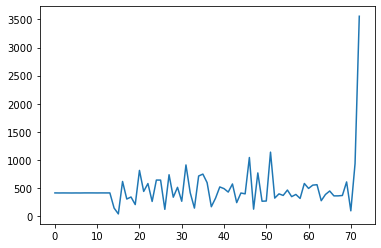

In [258]:
plt.plot(fs)
# plt.ylim([0, 1000])

In [259]:
ca_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/sessionwise_tba/BCI_26/BCI_26-041022-FOV_04.npy")
fl = os.path.abspath("../bucket/Data/Calcium_imaging/sessionwise_tba/BCI_26/filelist.json")
with open(fl) as f:
    filelist = json.load(f)

camera = "side"
mouse = "bci26"

# for session_name in next(os.walk(DLC_path))[1]:
ca_data = np.load(ca_data_path, allow_pickle=True).tolist()
F = ca_data["F_sessionwise"]
F_tw = ca_data['F_trialwise_closed_loop']
cni = ca_data["cn"][0]


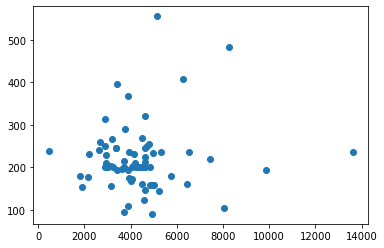

In [267]:
f_list = np.array([200, 200, 176, 200, 200,  96, 200,  91, 200, 200, 200, 200, 200,
       200, 168, 238, 162, 204, 173, 158, 195, 159, 250, 246, 237, 194,
       231, 219, 210, 555, 231, 161, 211, 251, 482, 256, 241, 179, 269,
       181, 123, 368, 216, 260, 214, 321, 158, 155, 407, 245, 144, 106,
       229, 290, 236, 202, 195, 147, 235, 237, 246, 110, 313, 178, 266,
       397, 157, 196, 203, 225, 203, 237])

k = [len(ft[i]) for i in range(len(f_list))]
plt.scatter(k, f_list)

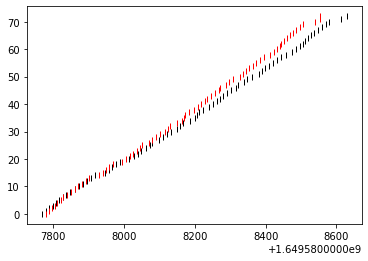

In [195]:
trial_start_times = np.asarray([ca_data["trial_start_times"][i].timestamp() for i in range(len(ca_data['trial_start_times']))])
tst_rel = np.asarray(np.cumsum(ca_data["trial_times"]).tolist())
plt.plot(trial_start_times, np.arange(len(trial_start_times)), 'k|')
plt.plot(tst_rel+ trial_start_times[0], np.arange(len(tst_rel)), 'r|')


In [196]:
trial_start_times[0] + np.arange(0, F.shape[1], 1)*ca_data["sampling_rate"]

array([1.64958777e+09, 1.64958779e+09, 1.64958781e+09, ...,
       1.65006038e+09, 1.65006040e+09, 1.65006042e+09])

In [236]:
ca_data['trial_times']

[11.179384,
 7.291786,
 9.4441,
 7.868652,
 7.022835,
 9.011783,
 7.125729,
 11.836637,
 11.627173,
 11.179262,
 8.946187,
 10.856868,
 10.248462,
 9.773566,
 27.576032,
 10.823042,
 7.2572,
 9.809711,
 11.884023,
 23.776632,
 12.128236,
 11.405626,
 8.134934,
 12.807076,
 8.259468,
 5.318996,
 17.919219,
 10.088416,
 12.348742,
 9.966451,
 15.516889,
 7.062559,
 6.965146,
 19.909191,
 11.558144,
 6.396441,
 4.421862,
 10.786134,
 13.898998,
 11.074693,
 9.353704,
 9.01511,
 6.504837,
 11.114098,
 11.15546,
 11.624986,
 4.616165,
 15.095451,
 8.137966,
 12.629887,
 19.377582,
 7.063355,
 9.058841,
 9.437527,
 10.565373,
 9.404383,
 11.179347,
 11.971996,
 15.689506,
 11.179937,
 9.37592,
 7.021042,
 5.176085,
 7.731523,
 8.263298,
 7.625516,
 8.715322,
 9.961921,
 11.18016,
 7.597006,
 32.755955,
 14.554422,
 1.523844]

In [113]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
DLC_dir = "/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/"
data_path = "bucket/Data/Calcium_imaging/sessionwise_tba"
camera = "side"
mouse = "bci26"

data_path = os.path.join(data_path, "BCI_26")
DLC_path = os.path.join(DLC_dir, camera, mouse)

# for session_name in next(os.walk(DLC_path))[1]:
for session_name in ["2022-04-12_11-01-11"]:
    session_path = os.path.join(DLC_path, session_name)
    session_date = session_name.split("_")[0].replace("-", "")[4:] + "22"
    
    ca_data_path = os.path.join(data_path, [k for k in next(os.walk(data_path))[2] if session_date in k][0])
    bodyparts = ["Pole", "Lickport", "PawL", "PawR", "NoseTip", "Jaw", "EyeUp", "EyeDown", "EyeLeft", "EyeRight", "TongueTip", "TongueMid"]
    trial_list = [k for k in next(os.walk(session_path))[2] if k.endswith("csv")]
    ca_data = np.load(ca_data_path, allow_pickle=True).tolist()
    F = ca_data["F_sessionwise"]
    cni = ca_data["cn"][0]
    
    
    # for trial in trial_list:
#         csvfile = pd.read_csv(os.path.join(session_path, trial), header=[1,2], index_col=0)
#         # for bp in bodyparts:
#         X = csvfile["Pole"][["x"]]
#         # X = (X-np.mean(X, axis=0))/np.mean(X, axis=0)
#         x = pd.Series(PCA(n_components=1).fit_transform(X).flatten())
#         # x = (x - np.min(x))/np.min(x)

#         X = X[::20]
#         x = x[::20]
#         y = ca_data["F_trialwise_closed_loop"][: , cni, 0].flatten()[:X.shape[0]]

#         plt.plot(X, label=["X", "Y"])
#         # plt.plot(x, label=["1st PC"])
#         # plt.title(bp)
#     plt.show()
#     break

StopIteration: 

In [445]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


DLC_dir = "/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/"
npy_data_dir = "bucket/Data/Calcium_imaging/sessionwise_tba"
camera = "side"
mouse = "BCI_26"

npy_data_dir = os.path.join(npy_data_dir, mouse)
DLC_path = os.path.join(DLC_dir, camera, mouse.lower().replace("_", ""))

# for session_name in next(os.walk(DLC_path))[1]:
for session_name in ["2022-04-12_11-01-11"]:
    session_path = os.path.join(DLC_path, session_name)
    session_date = session_name.split("_")[0].replace("-", "")[4:] + "22"
    sess_list = [k for k in next(os.walk(npy_data_dir))[2] if session_date in k]
    if sess_list is None:
        print(f"No npy file found for session date {session_date}")
        continue
        
    # for sess in sess_list:
    npy_data_path = os.path.join(npy_data_dir, sess_list[0])
    ca_data = np.load(npy_data_path, allow_pickle=True).tolist()
    
    #-------Get required variables from npy file---------
    F = ca_data["F_sessionwise"]
    F_tw = ca_data["F_trialwise_closed_loop"]
    cn = ca_data["cn"]
    fs = ca_data["sampling_rate"]
    #----------------------------------------------------
    
    trial_list = [k for k in next(os.walk(session_path))[2] if k.endswith("csv")]
    session_dlc_data = pd.concat([pd.read_csv(os.path.join(session_path, f), header=[1,2], index_col=0) for f in trial_list], ignore_index=True)
#     for dlc_var in session_dlc_data.columns:
#         if dlc_var[1] == 'likelihood':
#             print(dlc_var)
#             session_dlc_data.drop(index=dlc_var)
    session_dlc_data.drop('likelihood', level=1, axis=1, inplace=True)
    n_samples = session_dlc_data.shape[0]
    n_features = session_dlc_data.shape[1]
    
    max_index = n_samples//(n_features*int(fs))*n_features*int(fs)
    headers = session_dlc_data.keys()
    session_dlc_data = session_dlc_data[:max_index].values.reshape(-1, int(fs), n_features).mean(axis=1)
    n_samples = session_dlc_data.shape[0]
    
    F = F[:, :n_samples]
    beta_vals = np.zeros((F.shape[0], n_features))
    scores = []
    for neuron in range(F.shape[0]):
        lr = LinearRegression()
        lr.fit(session_dlc_data, F[neuron])
        scores.append(lr.score(session_dlc_data, F[neuron]))
        beta_vals[neuron] = lr.coef_
        


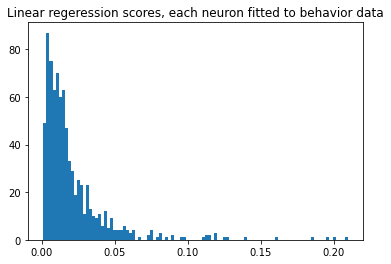

In [459]:
plt.hist(scores, bins=100)
plt.title("Linear regeression scores, each neuron fitted to behavior data")
plt.show()

In [338]:
csvfile["Pole"][["x", "y"]][::int(fs)].shape

(352, 2)

In [339]:
F_tw = ca_data["F_trialwise_closed_loop"]

In [340]:
csvfiles = pd.concat([pd.read_csv(os.path.join(session_path, f), header=[1,2], index_col=0) for f in trial_list], ignore_index=True)

In [349]:
n_features = csvfiles.shape[1]
n_samples = csvfiles.shape[0]
max_index = n_samples//(n_features*int(fs))*n_features*int(fs)

session_dlc = csvfiles[:max_index].values.reshape(-1, int(fs), n_features).mean(axis=1)
n_samples = session_dlc.shape[0]

F_sliced = F[:, :n_samples].T

In [350]:
F_sliced.shape

(26208, 813)

In [351]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = LinearRegression()
rd = Ridge(alpha=0.5)

rd.fit(session_dlc, F_sliced)
lr.fit(session_dlc, F_sliced)

LinearRegression()

In [352]:
print(rd.score(session_dlc, F_sliced))
print(lr.score(session_dlc, F_sliced))

0.022717350493923923
0.02397760075171415


In [443]:
lr.coef_.shape

(813, 36)

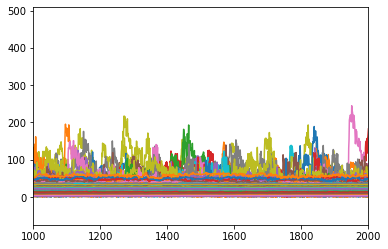

In [355]:
plt.plot(F_sliced)
plt.plot(X_hat)
plt.xlim([1000, 2000])
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [334, 240]

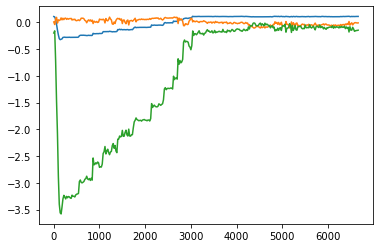

In [347]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA


model = Ridge(alpha=0.5)
X = csvfile["Pole"][["x", "y"]]
X = (X-np.mean(X, axis=0))/np.mean(X, axis=0)
x = pd.Series(PCA(n_components=1).fit_transform(X).flatten())
x = (x - np.min(x))/np.min(x)

X = X[::20]
x = x[::20]
y = ca_data["F_trialwise_closed_loop"][: , cni, 0].flatten()[:X.shape[0]]

plt.plot(X)
plt.plot(x)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores),np.std(scores)))

In [ ]:
PCA(n_components=1).fit_transform(X).flatten().shape

In [ ]:
X.mean(axis=0)

In [ ]:
for bp in bodyparts:
    X = csvfile[bp][["x", "y"]]
    # X = (X-np.mean(X, axis=0))/np.mean(X, axis=0)
    x = pd.Series(PCA(n_components=1).fit_transform(X).flatten())
    # x = (x - np.min(x))/np.min(x)

    X = X[::20]
    x = x[::20]
    y = ca_data["F_trialwise_closed_loop"][: , cni, 0].flatten()[:X.shape[0]]

    plt.plot(X, label=["X", "Y"])
    plt.plot(x, label=["1st PC"])
    plt.title(bp)
    plt.show()


In [131]:
x.shape

(232, 1)